# 파이썬 OpenCV를 이용한 영상처리_허진경
* Jupyter Notebook Info
>- Dayoung Yun
>- 2021/11/22

## 4장 엣지 검출
### 이미지 필터와 합성곱
#### 이미지 필터
>- 이미지 필터 커널(필터)행렬의 특성에 따라 원본 이미지로부터 특성이 강조된 이미지를 얻을 수 있음
>- 어떤 필터를 사용하느냐에 따라 결과가 전혀 다르게 나타남
>- 일반적으로 필터는 영상의 주목화소를 포함한 주위 화소들과 1:1 대응되어 곱해진 후 합해짐
#### 합성곱
>- 합성곱 필터를 적용할 수 있는 영역에 대해서 현재 주목화소와 주위 화소의 배열을 각 요소끼리 모두 곱한 후 모든 항목을 더함
>- 합성곱에 사용하는 필터의 크기는 정해진 것은 없지만 일반적으로 3X3 필터를 가장 많이 사용함
>- cf) zero-padding : 이미지 크기가 크면 상관없지만 이미지의 크기가 작으면 화소 손실이 많이 일어남 , 제로 패딩을 사용하면 이미지의 크기가 줄어 들지는 않음
#### 합성곱 함수 구현하기
>- padding의 매개변수가 same 이면 필터의 크기에 의해 계산되지 않는 바깥 테두리의 0화소가 생기지 않게 해줌

In [19]:
import numpy as np

def Conv2D(img, kernel = None, padding = 'valid'):
    if kernel is not None:
        h, w = img.shape[0:2]
        sy, sx = int(len(kernel)/2), int(len(kernel[0])/2)
        
        if padding == 'same':
            new_shape = (h+2*sy, w + 2*sx)
            img_out = np.zeros(new_shape, dtype = np.uint8)
            
        elif padding == 'valid':
            img_out = np.zeros(img.shape, dtype= np.uint8)
            
        height, width = img_out.shape
        
        for y in range(sy, height -sy):
            for x in range(sx, width -sx):
                roi = img[y-sy : y+sy+1, x-sx : x+sx+1]
                filtered = roi * kernel
                pixel_value = np.abs(np.sum(filtered))
                img_out[y,x] = np.uint8(pixel_value)
                
        return img_out[sy: -sy, sx:-sx]
    else:
        print('Kernel array not found!')

In [21]:
import cv2

img = cv2.imread('house.jpg', cv2.IMREAD_GRAYSCALE)
kernel = np.array([[0,0,0],[0,1,-1], [0,0,0]]) # 차분 필터
output = Conv2D(img, kernel = kernel, padding = 'same')
cv2.imshow('House', img)
cv2.imshow('Conv2D', output)
cv2.waitKey()
cv2.destroyAllWindows()

ValueError: operands could not be broadcast together with shapes (3,2) (3,3) 

#### cv2.filter2D(src, ddepth, kernel, anchor = None, delta = None, borderType = None) ->dst
>- OpenCV에서 제공하는 합성곱 함수

In [23]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('house.jpg', cv2.IMREAD_GRAYSCALE)

kernel = np.array([[0,0,0], [0,1,-1], [0,0,0]])
output = cv2.filter2D(img, -1, kernel)

cv2.imshow('House', img)
cv2.imshow('filter2D', output)
cv2.waitKey()
cv2.destroyAllWindows()

### 엣지 검출 필터
>- 경계선 영역을 찾는 것 
>- 윤곽선  = 엣지
>- 차분필터, 로버츠필터, 프리위트 필터, 소벨 필터, 라블라시안 필터
#### 차분 필터
>- 현재 화소와 오른쪽 및 아래 이웃 화소의 차이를 이용해서 엣지를 찾음

In [26]:
import numpy as np

def diff_filter(img):
    height, width = img.shape
    img_ = np.zeros(img.shape, dtype = np.uint8)
    
    for y in range(height -1):
        for x in range(width -1):
            H = 1 * img[y,x] + -1 * img[y, x+1]
            V = 1 * img[y,x] + -1 * img[y+1, x]
            img_[y,x] = np.sqrt(H**2 + V**2)
    return img_

In [27]:
import cv2

img = cv2.imread('house.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imshow('Origin', img)
cv2.imshow('Diff Filter', diff_filter(img))
cv2.waitKey()
cv2.destroyAllWindows()

In [30]:
import cv2
import numpy as np

img = cv2.imread('house.jpg', cv2.IMREAD_GRAYSCALE)
x_kernel = np.array([[-1,1]])
y_kernel = np.array([[-1, 1]])

x_edge = cv2.filter2D(img, -1, x_kernel)
y_edge = cv2.filter2D(img, -1, y_kernel)

cv2.imshow('Origin', img)
cv2.imshow('Diff filter X, Y', np.c_[x_edge, y_edge])
cv2.imshow('Diff filter', x_edge + y_edge)
cv2.waitKey()
cv2.destroyAllWindows()

#### 로버츠 필터
>- 대각선 방향의 이웃 화소의 차이를 이용해서 엣지를 찾음
>- 대각선 경계를 찾는 데 유리

In [31]:
import numpy as np

def rovers_filter(img):
    height, width = img.shape
    img_ = np.zeros(img.shape, dtype = np.uint8)
    
    for y in range(1, height -1):
        for x in range(1, width -1):
            H = 1 * img[y,x] + -1 * img[y+1, x+1]
            V = 1 * img[y,x+1] + -1 * img[y+1, x]
            img_[y,x] = np.sqrt(H**2 + V**2)
    return img_


import cv2
import numpy as np

img = cv2.imread('house.jpg', cv2.IMREAD_GRAYSCALE)
x_kernel = np.array([[-1,1]])
y_kernel = np.array([[-1, 1]])

x_edge = cv2.filter2D(img, -1, x_kernel)
y_edge = cv2.filter2D(img, -1, y_kernel)

cv2.imshow('Origin', img)
cv2.imshow('Rovert filter X, Y', np.c_[x_edge, y_edge])
cv2.imshow('Rovert filter', x_edge + y_edge)
cv2.waitKey()
cv2.destroyAllWindows()

#### 프리위트 필터
>- 수평과 수직 성분의 경계를 더 강조
>- 이미지 화소의 기울기를 계산하여 가능한 최대 증가 방향과 해당 방향의 변화율을 제공

In [32]:
import numpy as np

def prewitt_filter(img):
    height, width = img.shape[:2]
    img_ = np.zeros(img.shape, dtype = np.uint8)
    
    for y in range(1, height -1):
        for x in range(1, width -1):
            H = 1 * img[y-1,x-1] + 0 * img[y-1, x] + -1 * img[y-1, x+1] \
            + 1 * img[y,x-1] + 0 * img[y, x] + -1 * img[y, x+1]\
             + 1 * img[y+1,x-1] + 0 * img[y+1, x] + -1 * img[y+1, x+1]
            
            V = 1 * img[y-1,x-1] + 1 * img[y-1, x] + 1 * img[y-1, x+1] \
            + 0 * img[y,x-1] + 0 * img[y, x] + 0 * img[y, x+1]\
            + -1 * img[y+1,x-1] + -1 * img[y+1, x] + -1 * img[y+1, x+1]
            
            img_[y,x] = (np.abs(H) + np.abs(V))/2
    return img_


In [34]:
import cv2
img = cv2.imread('house.jpg', cv2.IMREAD_GRAYSCALE)

cv2.imshow('Origin', img)
cv2.imshow('Prewitt filter', prewitt_filter(img))
cv2.waitKey()
cv2.destroyAllWindows()

In [35]:
import cv2
import numpy as np

img = cv2.imread('house.jpg', cv2.IMREAD_GRAYSCALE)
x_kernel = np.array([[-1,0,1], [-1, 0,1], [-1, 0,1]])
y_kernel = np.array([[-1,-1, 1], [0,0,0], [1,1,1]])

x_edge = cv2.filter2D(img, -1, x_kernel)
y_edge = cv2.filter2D(img, -1, y_kernel)

cv2.imshow('Origin', img)
cv2.imshow('Diff filter X, Y', np.c_[x_edge, y_edge])
cv2.imshow('Diff filter', x_edge + y_edge)
cv2.waitKey()
cv2.destroyAllWindows()

#### 소벨필터
>- 3x3 행렬을 사용하여 연산했을 경우 중심을 기준으로 각 방향의 앞뒤의 값을 비교하여 변화량을 검출하는 알고리즘
>- 중앙값을 강조하기 위하여 2의 가중치를 사용
>- 대각선 방향을 더 민감하게 반응

In [36]:
import numpy as np

def sobel_filter(img):
    height, width = img.shape[:2]
    img_ = np.zeros(img.shape, dtype = np.uint8)
    
    for y in range(1, height -1):
        for x in range(1, width -1):
            H = 1 * img[y-1,x-1] + 0 * img[y-1, x] + -1 * img[y-1, x+1] \
            + 2 * img[y,x-1] + 0 * img[y, x] + -2 * img[y, x+1]\
             + 1 * img[y+1,x-1] + 0 * img[y+1, x] + -1 * img[y+1, x+1]
            
            V = 1 * img[y-1,x-1] + 2 * img[y-1, x] + -1 * img[y-1, x+1] \
            + 0 * img[y,x-1] + 0 * img[y, x] + 0 * img[y, x+1]\
            + -1 * img[y+1,x-1] + -2 * img[y+1, x] + -1 * img[y+1, x+1]
            
            img_[y,x] = (np.abs(H) + np.abs(V))/2
    return img_


In [37]:
import cv2
img = cv2.imread('house.jpg', cv2.IMREAD_GRAYSCALE)

cv2.imshow('Origin', img)
cv2.imshow('Sobel filter', sobel_filter(img))
cv2.waitKey()
cv2.destroyAllWindows()

#### cv2.Sobel(src, depth, dx, dy, dst, ksize, scale, delta) ->dst

In [44]:
import cv2
import numpy as np

img = cv2.imread('house.jpg', cv2.IMREAD_GRAYSCALE)
x_edge = cv2.Sobel(img, -1, 1, 0, ksize = 3)
y_edge = cv2.Sobel(img, -1, 0, 1, ksize = 3)

cv2.imshow('Origin',img)
cv2.imshow('Sobel Filter X Y', np.c_[x_edge, y_edge])
cv2.imshow('Sobel Filter', x_edge+y_edge)
cv2.waitKey()
cv2.destroyAllWindows()

#### 라플라시안 필터
>- 현재 주목화소에 가중치를 더 많이 부여
>- 중앙값에 가중치를 주면 테두리 성분이 더 강하게 나타남

In [45]:
import numpy as np

def laplacian_filter(img):
    height, width = img.shape[:2]
    img_ = np.zeros(img.shape, dtype = np.uint8)
    
    for y in range(1, height -1):
        for x in range(1, width -1):
            T = 0 * img[y-1,x-1] + -1 * img[y-1, x] + 0 * img[y-1, x+1] \
            + -1 * img[y,x-1] + 4 * img[y, x] + -1 * img[y, x+1]\
             +0 * img[y+1,x-1] + -1 * img[y+1, x] + 0 * img[y+1, x+1]
            
            img_[y,x] = np.abs(T)
    return img_


In [46]:
import cv2
import numpy as np

img = cv2.imread('house.jpg', cv2.IMREAD_GRAYSCALE)

cv2.imshow('Origin',img)
cv2.imshow('Laplacian Filter', laplacian_filter(img))
cv2.waitKey()
cv2.destroyAllWindows()

In [49]:
import cv2
import numpy as np

img = cv2.imread('house.jpg', cv2.IMREAD_GRAYSCALE)

filter = [[0,1,0], [1, -4, 1], [0,1,0]]
mask = np.array(filter)
output = Conv2D(img, kernel = mask)

cv2.imshow('House', img)
cv2.imshow('Laplacian Filter', output)
cv2.waitKey()
cv2.destroyAllWindows()

#### cv.Laplacian(src, ddepth, dst, ksize, scale, delta) ->dst

In [51]:
import cv2

img = cv2.imread('house.jpg', cv2.IMREAD_GRAYSCALE)

cv2.imshow('Origin', img)
cv2.imshow('cv2.Laplacian', cv2.Laplacian(img, -1))
cv2.waitKey()
cv2.destroyAllWindows()

#### 엣지 추출 필터 비교

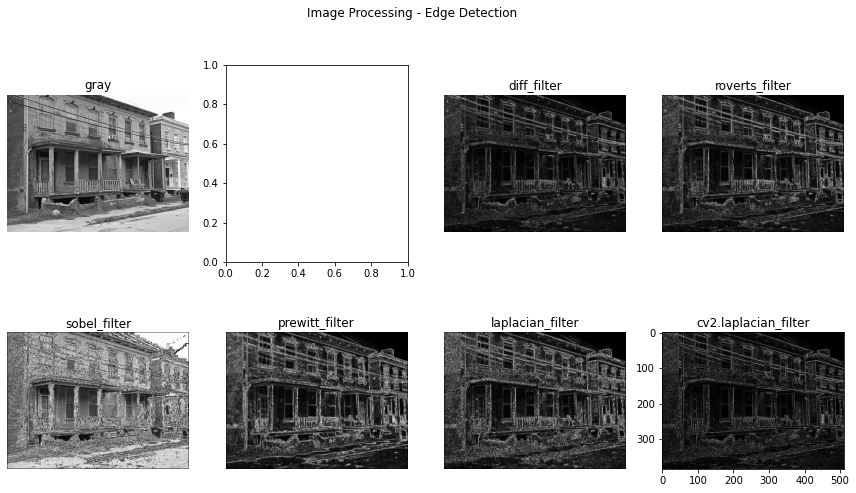

In [55]:
house_gray = cv2.imread('house.jpg', cv2.IMREAD_GRAYSCALE)

A = diff_filter(house_gray)
B = rovers_filter(house_gray)
C = sobel_filter(house_gray)
D = prewitt_filter(house_gray)
E = laplacian_filter(house_gray)
F = cv2.Laplacian(house_gray, cv2.CV_8U)


import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,4, figsize = (15,8))
fig.suptitle('Image Processing - Edge Detection')

axes[0,0].imshow(house_gray, cmap = 'gray')
axes[0,0].axis('off'); axes[0,0].set_title('gray')

#axes[0,1].imshow(two_tone(house_gray), cmap = 'gray')
#axes[0,1].axis('off'); axes[0,1].set_title('two tone')

axes[0,2].imshow(A, cmap = 'gray')
axes[0,2].axis('off'); axes[0,2].set_title('diff_filter')

axes[0,3].imshow(B, cmap = 'gray')
axes[0,3].axis('off'); axes[0,3].set_title('roverts_filter')

axes[1,0].imshow(C, cmap = 'gray')
axes[1,0].axis('off'); axes[1,0].set_title('sobel_filter')

axes[1,1].imshow(D, cmap = 'gray')
axes[1,1].axis('off'); axes[1,1].set_title('prewitt_filter')

axes[1,2].imshow(E, cmap = 'gray')
axes[1,2].axis('off'); axes[1,2].set_title('laplacian_filter')

axes[1,3].imshow(F, cmap = 'gray')
axes[1,3].set_title('cv2.laplacian_filter')

plt.show()

### 캐니 엣지
#### 캐니 엣지
>- 노이즈 제거 : 가우시안 필터를 사용하여 이미지의 노이즈 제거
>- 소벨필터로 엣지 찾기: 수평 밀 수직 방향 모두에서 소벨 필터 커널로 필터링 되어 수평방향 및 수직 방향에서 1차 도함수를 얻음, 이 두 이미지에서 다음과 같이 각 픽셀의 엣지 그래디언트와 방향을 찾을 수 있음
>- 기울기 크기 임계값, 하한 컷오프 억제를 적용
>- 히스테리시스 임계값 : 모든 엣지가 실제로 엣지인지 아닌지 결정, minVal, maxVal 의 임계값 필요
#### cv2.Canny(img, minVal, maxVal, apertureSize, L2gradient)
>- apartureSize : 소벨 필터의 크기를 넣음 

In [56]:
import cv2

img = cv2.imread('house.jpg', cv2.IMREAD_GRAYSCALE)
output = cv2.Canny(img, 150,200)
cv2.imshow('Canny Edge', output)
cv2.waitKey()
cv2.destroyAllWindows()

In [58]:
import cv2

def onChange(x):
    low = cv2.getTrackbarPos('Low', 'Edge Detection')
    high = cv2.getTrackbarPos('High', 'Edge Detection')
    
    if low > high :
        pass
    else:
        canny = cv2.Canny(img, low, high)
        cv2.imshow('Edge Detection', canny)
        
img = cv2.imread('house.jpg', cv2.IMREAD_GRAYSCALE)

cv2.namedWindow('Edge Detection')

cv2.createTrackbar('Low Thr', 'Edge Detection', 0, 255, onChange)
cv2.createTrackbar('High Thr', 'Edge Detection', 0, 255, onChange)
cv2.imshow('Edge Detection', img)

while True:
    key = cv2.waitKey(0) & 0xFF
    
    if key ==27:
        break
    low = cv2.getTrackbarPos('Low Thr', 'Edge Detection')
    high = cv2.getTrackbarPos('High Thr', 'Edge Detection')
    
    if low> high:
        print('Low threshold must be low than high threshold')
    elif ((low == 0) and (higth ==0)):
        cv2.imshow('Edge Detection', img)
    else:
        canny = cv2.Canny(img, low, high)
        cv2.imshow('Edge Detection', canny)
        
cv2.destroyAllWindows()